In [72]:
import numpy as np
import sep

In [73]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [74]:
from astropy.utils.data import get_pkg_data_filename


image_file = get_pkg_data_filename('data.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)

Filename: data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   
(3600, 3600)


/var/folders/yg/8t9qvvld4ds4nkfwlmvwm_mw0000gn/T/ipykernel_42974/4266436872.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


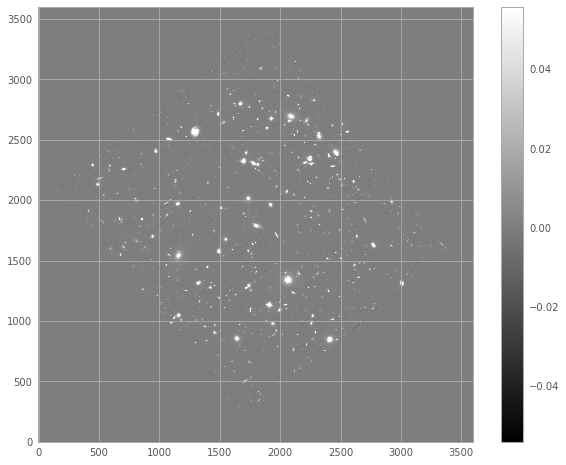

In [75]:
# show the image
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('fig5.png')

In [76]:
# measure a spatially varying background on the image
# image_data = image_data.byteswap().newbyteorder()
image_data = image_data.byteswap(False).newbyteorder()
bkg = sep.Background(image_data)


In [77]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [78]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

/var/folders/yg/8t9qvvld4ds4nkfwlmvwm_mw0000gn/T/ipykernel_42974/3897308333.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


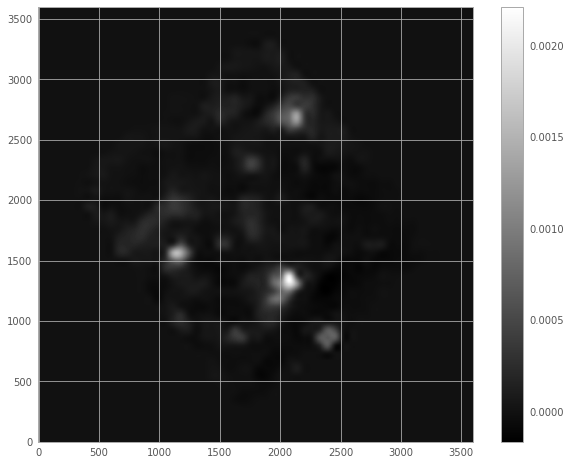

In [79]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('fig6.png')

In [80]:

# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

/var/folders/yg/8t9qvvld4ds4nkfwlmvwm_mw0000gn/T/ipykernel_42974/2446506595.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


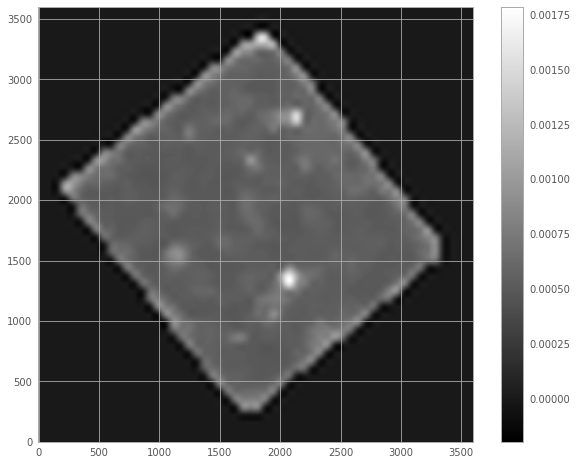

In [81]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('fig7.png')

In [82]:
# subtract the background
data_sub = image_data - bkg


In [83]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [84]:
# how many objects were detected
len(objects)

8640

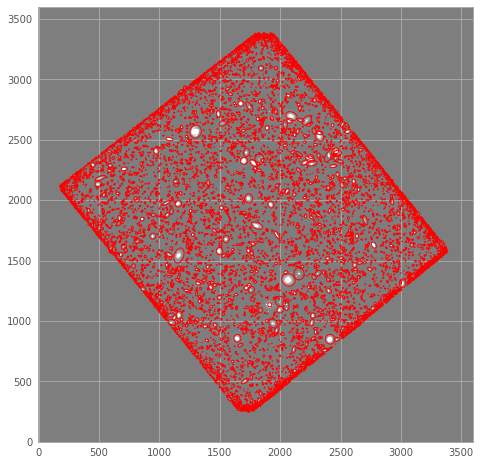

In [89]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('fig8.png')

Text(0.5, 1.0, 'Histogram of Fluxes')

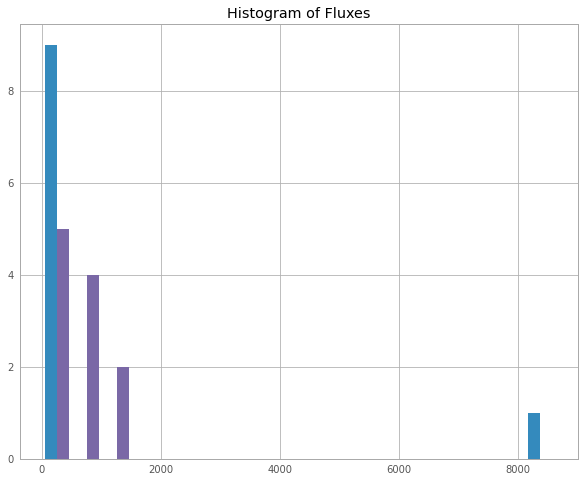

In [90]:

a=np.histogram(objects['flux'], bins=10, range=None, normed=None, weights=None, density=None)

plt.hist(a, bins = 'auto')
plt.title("Histogram of Fluxes")

In [91]:
# Mean and Median of Fluxes
m, s ,md= np.mean(objects['flux']), np.std(objects['flux']),np.median(objects['flux'])
print("Mean: ",m)
print("Standard Deviation: ",s)
print("Median: ",md)

Mean:  1.1726778032743217
Standard Deviation:  17.547420912246842
Median:  0.034888697788119316


In [103]:
# Calculating the largest outlier
mx= (np.max(objects['flux']))
mn = (np.min (objects['flux']))

dist1=mx-m
dist2 =m-mn
print("Distance of max value from mean: ",dist1, "\nDistance of min value from mean:",dist2)
print("Largest Outlier: ",mx)

Distance of max value from mean:  1217.2253934857881 
Distance of min value from mean: 1.1678394483887435
Largest Outlier:  1218.3980712890625


In [104]:
# Dist1 > Dist2 means the biggest outlier in the flux is dist1 which is 1218.3980712890625

final = dist1/md
print("Largest Outlier's distance from the mean in terms of Standard Deviations: ",final)

# The largest outlier is 34888.817028312566 Standard Deviations away from the mean

Largest Outlier's distance from the mean in terms of Standard Deviations:  34888.817028312566


In [105]:
# Locating the position of the outlier on the image
result = np.where(objects['flux'] == mx)
print(result)

(array([2066]),)
